#***Classify Gestures by Reading Muscle Activity***

a recording of human hand muscle activity producing four different hand gestures

Import useful functions and workspace

In [ ]:
import numpy as np
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

Load datasets

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_folder = 'drive/MyDrive/Colab Notebooks/GesturesClassification/'

In [ ]:
gesture_0 = pd.read_csv(data_folder + '0.csv', header = None)
gesture_1 = pd.read_csv(data_folder + '1.csv', header = None)
gesture_2 = pd.read_csv(data_folder + '2.csv', header = None)
gesture_3 = pd.read_csv(data_folder + '3.csv', header = None)

In [ ]:
gesture_0.shape, gesture_1.shape, gesture_2.shape, gesture_3.shape

((2910, 65), (2903, 65), (2943, 65), (2922, 65))

Concatenate all 4 datasets into a single one

In [ ]:
gesture_0.reset_index(drop=True, inplace=True)
gesture_1.reset_index(drop=True, inplace=True)
gesture_2.reset_index(drop=True, inplace=True)
gesture_3.reset_index(drop=True, inplace=True)
data = pd.concat([gesture_0, gesture_1, gesture_2, gesture_3], ignore_index=True)

In [ ]:
data.columns = data.columns.astype(str)
sensor_groups_headers = [f'{i}_{j}' for i in range(1, 9) for j in range(1, 9)]
data.columns = sensor_groups_headers + ['gestures']

In [ ]:
data.shape

(11678, 65)

In [ ]:
display(pd.concat([data.head(5), data.tail(5)]))

,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_8,2_1,2_2,...,7_8,8_1,8_2,8_3,8_4,8_5,8_6,8_7,8_8,gestures
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
11673,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,...,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11674,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,...,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11675,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,...,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11676,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,...,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3
11677,-2.0,4.0,2.0,-4.0,12.0,3.0,-2.0,9.0,-8.0,-2.0,...,2.0,1.0,0.0,-1.0,-2.0,-30.0,64.0,11.0,5.0,3


Normalize sensor data and split samples into training (70%), validation (20%) and testing (10%)

In [ ]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [ ]:
print(type(X))
print(X.shape)
print(type(Y))
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
(11678, 64)
<class 'pandas.core.series.Series'>
(11678,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 1/3, random_state = 42)

In [ ]:
print('Training set shapes:')
print('sensor_train:', X_train.shape)
print('output_gesture_train:', Y_train.shape)

print('\nValidation set shapes:')
print('sensor_data_val:', X_val.shape)
print('output_gesture_val:', Y_val.shape)

print('\nTest set shapes:')
print('sensor_data_test:', X_test.shape)
print('output_gesture_test:', Y_test.shape)

Training set shapes:
sensor_train: (8174, 64)
output_gesture_train: (8174,)

Validation set shapes:
sensor_data_val: (2336, 64)
output_gesture_val: (2336,)

Test set shapes:
sensor_data_test: (1168, 64)
output_gesture_test: (1168,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = pd.DataFrame(sc.fit_transform(X_train))
X_test_s = pd.DataFrame(sc.transform(X_test))
X_val_s = pd.DataFrame(sc.transform(X_val))

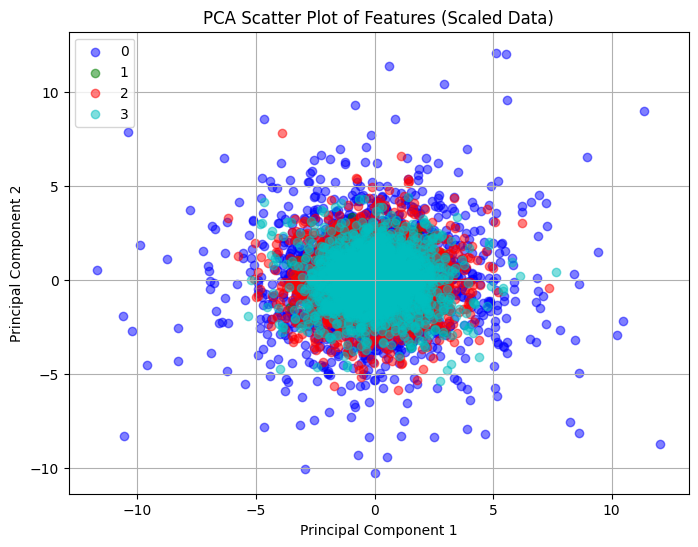

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_s)

plt.figure(figsize=(8, 6))
classes = Y_train.unique()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, class_ in enumerate(classes):
    plt.scatter(X_train_pca[Y_train == class_, 0], X_train_pca[Y_train == class_, 1],
                c=colors[i],
                label=class_,
                alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot of Features (Scaled Data)')
plt.legend()
plt.grid(True)
plt.show()

#Support Vector Classification (SVC)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import time

grid = {'C'      : [0.1, 1, 10, 100, 1000],#np.logspace(-4,3,10),
        'kernel' : ['rbf'],
        'gamma'  : [1, 0.1, 0.01, 0.001, 0.0001]}#np.logspace(-4,3,10)}

MS = GridSearchCV(estimator   = SVC(),
                  param_grid  = grid,
                  scoring     = 'accuracy',
                  cv          = 10,
                  verbose     = 2)


start_time = time.time()

H = MS.fit(X_val_s, Y_val)

end_time = time.time()
training_time = end_time - start_time
print("Total training time:", training_time, "seconds")

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .......................C=0.1, gamma=0

In [ ]:
print("Best: %f using %s" % (H.best_score_, H.best_params_))
means = H.cv_results_['mean_test_score']
stds = H.cv_results_['std_test_score']
params = H.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.857445 using {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.259418 (0.002077) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.289377 (0.012099) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.523977 (0.022000) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.259418 (0.002077) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.259418 (0.002077) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.259418 (0.002077) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.574036 (0.017359) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.752568 (0.014699) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.401537 (0.014420) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.259418 (0.002077) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.259418 (0.002077) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.601867 (0.017493) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.857445 (0.019915) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.579199 (0.029358) with: {'C': 10, 'gamma': 0.001, 'kernel

In [ ]:
M = SVC(C                       = H.best_params_['C'],
        kernel                  = 'rbf',
        gamma                   = H.best_params_['gamma'],
        decision_function_shape = 'ovr')

M.fit(X_train_s, Y_train)
Y_pred_svm = M.predict(X_test_s)
err = np.mean(Y_pred_svm != Y_test)
print(err)

0.09417808219178082


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report: \n', classification_report(Y_test,Y_pred_svm))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       269
           1       0.90      0.97      0.94       317
           2       0.93      0.87      0.90       284
           3       0.89      0.84      0.86       298

    accuracy                           0.91      1168
   macro avg       0.91      0.91      0.90      1168
weighted avg       0.91      0.91      0.91      1168



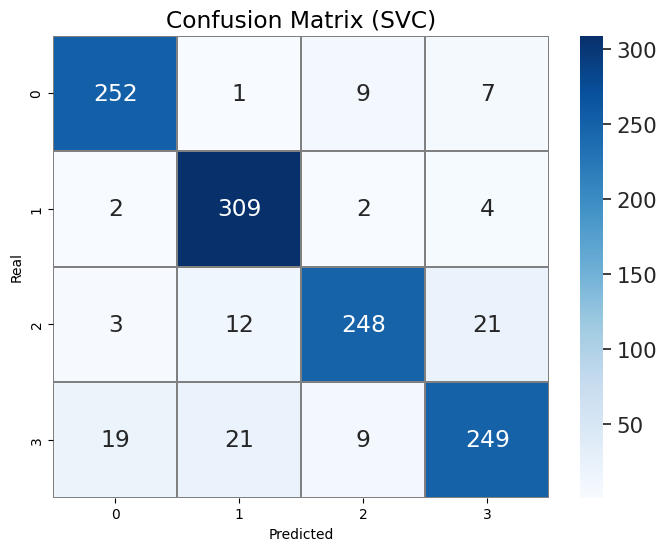

In [ ]:
import seaborn as sns
f,ax = plt.subplots(figsize=(8, 6))
confusion_mtx = confusion_matrix(Y_test,Y_pred_svm)
sns.set(font_scale=1.4)
sns.heatmap(confusion_mtx, annot=True, fmt='d', linewidths=0.01,cmap="Blues",linecolor="gray",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Confusion Matrix (SVC)")
plt.show()

#Random Forest  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_search = {'max_features' : ['log2', 'sqrt'],
               'max_samples' : [0.3, 0.5, 0.7]}

GS = GridSearchCV(estimator   = RandomForestClassifier(),
                  param_grid  = grid_search,
                    scoring   = 'accuracy',
                    cv        = 10,
                    verbose   = 2)

start_time = time.time()

H = GS.fit(X_val_s, Y_val)

end_time = time.time()
training_time = end_time - start_time
print("Total training time:", training_time, "seconds")

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END .................max_features=log2, max_samples=0.3; total time=   0.5s
[CV] END .................max_features=log2, max_samples=0.3; total time=   0.5s
[CV] END .................max_features=log2, max_samples=0.3; total time=   0.5s
[CV] END .................max_features=log2, max_samples=0.3; total time=   0.5s
[CV] END .................max_features=log2, max_samples=0.3; total time=   0.5s
[CV] END .................max_features=log2, max_samples=0.3; total time=   0.5s
[CV] END .................max_features=log2, max_samples=0.3; total time=   0.5s
[CV] END .................max_features=log2, max_samples=0.3; total time=   0.5s
[CV] END .................max_features=log2, max_samples=0.3; total time=   0.5s
[CV] END .................max_features=log2, max_samples=0.3; total time=   0.5s
[CV] END .................max_features=log2, max_samples=0.5; total time=   0.7s
[CV] END .................max_features=log2, max

In [ ]:
print("Best: %f using %s" % (H.best_score_, H.best_params_))
means = H.cv_results_['mean_test_score']
stds = H.cv_results_['std_test_score']
params = H.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.910964 using {'max_features': 'log2', 'max_samples': 0.7}
0.901544 (0.019986) with: {'max_features': 'log2', 'max_samples': 0.3}
0.904543 (0.014794) with: {'max_features': 'log2', 'max_samples': 0.5}
0.910964 (0.014879) with: {'max_features': 'log2', 'max_samples': 0.7}
0.900259 (0.019539) with: {'max_features': 'sqrt', 'max_samples': 0.3}
0.901981 (0.020428) with: {'max_features': 'sqrt', 'max_samples': 0.5}
0.900686 (0.012966) with: {'max_features': 'sqrt', 'max_samples': 0.7}


In [ ]:
print("Best: %f using %s" % (H.best_score_, H.best_params_))

Best: 0.910964 using {'max_features': 'log2', 'max_samples': 0.7}


In [ ]:
M = RandomForestClassifier(max_features  = H.best_params_['max_features'],
                           max_samples   = H.best_params_['max_samples'])
M.fit(X_train_s, Y_train)

Y_pred_rf = M.predict(X_test_s)
err = np.mean(Y_pred_rf != Y_test)
print(err)

0.07705479452054795


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report: \n', classification_report(Y_test,Y_pred_rf))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       269
           1       0.96      0.92      0.94       317
           2       0.92      0.96      0.94       284
           3       0.90      0.85      0.88       298

    accuracy                           0.92      1168
   macro avg       0.92      0.92      0.92      1168
weighted avg       0.92      0.92      0.92      1168



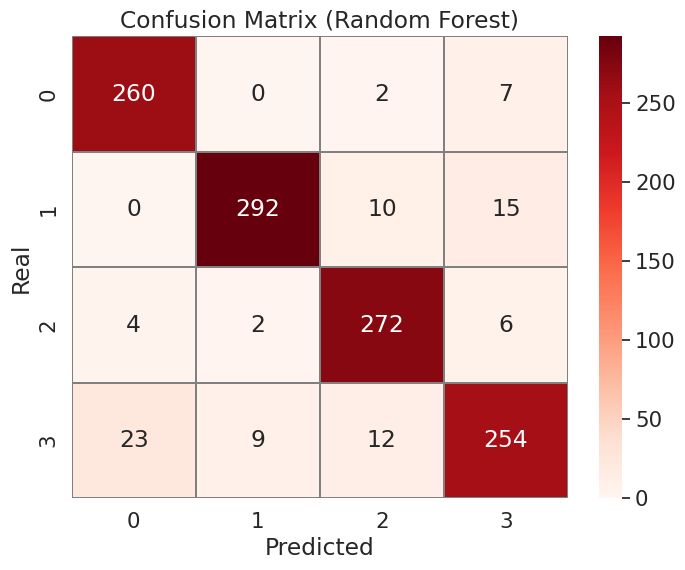

In [ ]:
from sklearn.metrics import confusion_matrix
f,ax = plt.subplots(figsize=(8, 6))
confusion_mtx = confusion_matrix(Y_test,Y_pred_rf)
sns.set(font_scale=1.4)
sns.heatmap(confusion_mtx, annot=True,  fmt='d', linewidths=0.01,cmap="Reds",linecolor="gray",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

# Metrics

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
metrics = []
models = ['Support Vector Classifier', 'Random Forest']
predictions=[Y_pred_svm, Y_pred_rf]

for lab,i in zip(models, predictions):
    precision, recall, fscore, _ = score(Y_test, i, average='weighted')
    accuracy = accuracy_score(Y_test, i)
    f1 = 2 * (precision * recall) / (precision + recall)
    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                              'f1-score':f1, 'accuracy':accuracy}, name=lab))

metrics = pd.concat(metrics, axis=1)

In [ ]:
metrics

,Support Vector Classifier,Random Forest
precision,0.905870,0.923433
recall,0.905822,0.922945
f1-score,0.905846,0.923189
accuracy,0.905822,0.922945
